<a href="https://colab.research.google.com/github/ShadyGirgis79/Breast-Cancer-Diagnosis/blob/main/Breast_Cancer_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
# Essentials
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Postprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import time

# Dataset: **Breast Cancer Diagnosis**

In [ ]:
BCD = pd.read_csv("breast_cancer_diagnosis.csv")
print(BCD.shape)
BCD.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
BCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
BCD.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
BCD.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Preprocessing

## Changing Categorical Values to Numerical Values

In [ ]:
# There is only 1 categorical column 'diagnosis'
BCD['diagnosis'] = BCD['diagnosis'].map({'M':1 ,'B':0})
BCD.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Normalization

In [ ]:
# Normalize columns with big-value-range data
big_values_columns = ['radius_mean', 'texture_mean','perimeter_mean',
                      'area_mean','perimeter_se','area_se','radius_worst',
                      'texture_worst','perimeter_worst','area_worst']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns using Min-Max normalization
BCD[big_values_columns] = scaler.fit_transform(BCD[big_values_columns])

BCD.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,0.521037,0.022658,0.545989,0.363733,0.11840,0.27760,0.3001,0.14710,...,0.141525,0.668310,0.450698,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,0.643144,0.272574,0.615783,0.501591,0.08474,0.07864,0.0869,0.07017,...,0.303571,0.539818,0.435214,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,0.601496,0.390260,0.595743,0.449417,0.10960,0.15990,0.1974,0.12790,...,0.360075,0.508442,0.374508,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,0.210090,0.360839,0.233501,0.102906,0.14250,0.28390,0.2414,0.10520,...,0.385928,0.241347,0.094008,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,0.629893,0.156578,0.630986,0.489290,0.10030,0.13280,0.1980,0.10430,...,0.123934,0.506948,0.341575,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Removing Unneeded Columns

In [ ]:
# There are 2 unneeded columns: 'Unnamed: 32' and 'id'
BCD = BCD.drop(['Unnamed: 32','id'] , axis = 1)
BCD.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.620776,0.141525,0.668310,0.450698,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,0.643144,0.272574,0.615783,0.501591,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.606901,0.303571,0.539818,0.435214,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,0.601496,0.390260,0.595743,0.449417,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.556386,0.360075,0.508442,0.374508,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,0.210090,0.360839,0.233501,0.102906,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.248310,0.385928,0.241347,0.094008,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,0.629893,0.156578,0.630986,0.489290,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.519744,0.123934,0.506948,0.341575,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Removing Outliers using the Z-Score Method

In [ ]:
# Calculate the mean and standard deviation for each column
BCD_means = np.mean(BCD, axis=0)
BCD_std_devs = np.std(BCD, axis=0)

# Calculate the z-score for each cell based on its column
z_scores_BCD = (BCD - BCD_means) / BCD_std_devs

# Define a threshold for outliers (±3 standard deviations)
threshold = 3

# Identify outliers
outliers_BCD = np.abs(z_scores_BCD) > threshold

print(z_scores_BCD.shape)
z_scores_BCD.head()

(569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
# Remove outliers
BCD_cleaned = BCD[~np.any(outliers_BCD, axis=1)]

print(BCD_cleaned.shape)
BCD_cleaned.head()

(495, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,0.643144,0.272574,0.615783,0.501591,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.606901,0.303571,0.539818,0.435214,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,0.601496,0.390260,0.595743,0.449417,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.556386,0.360075,0.508442,0.374508,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,0.629893,0.156578,0.630986,0.489290,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.519744,0.123934,0.506948,0.341575,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,0.258839,0.202570,0.267984,0.141506,0.12780,0.17000,0.1578,0.08089,0.2087,...,0.268232,0.312633,0.263908,0.136748,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,0.533343,0.347311,0.523875,0.380276,0.09463,0.10900,0.1127,0.07400,0.1794,...,0.531839,0.416844,0.511928,0.349194,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


## Correlation Matrix

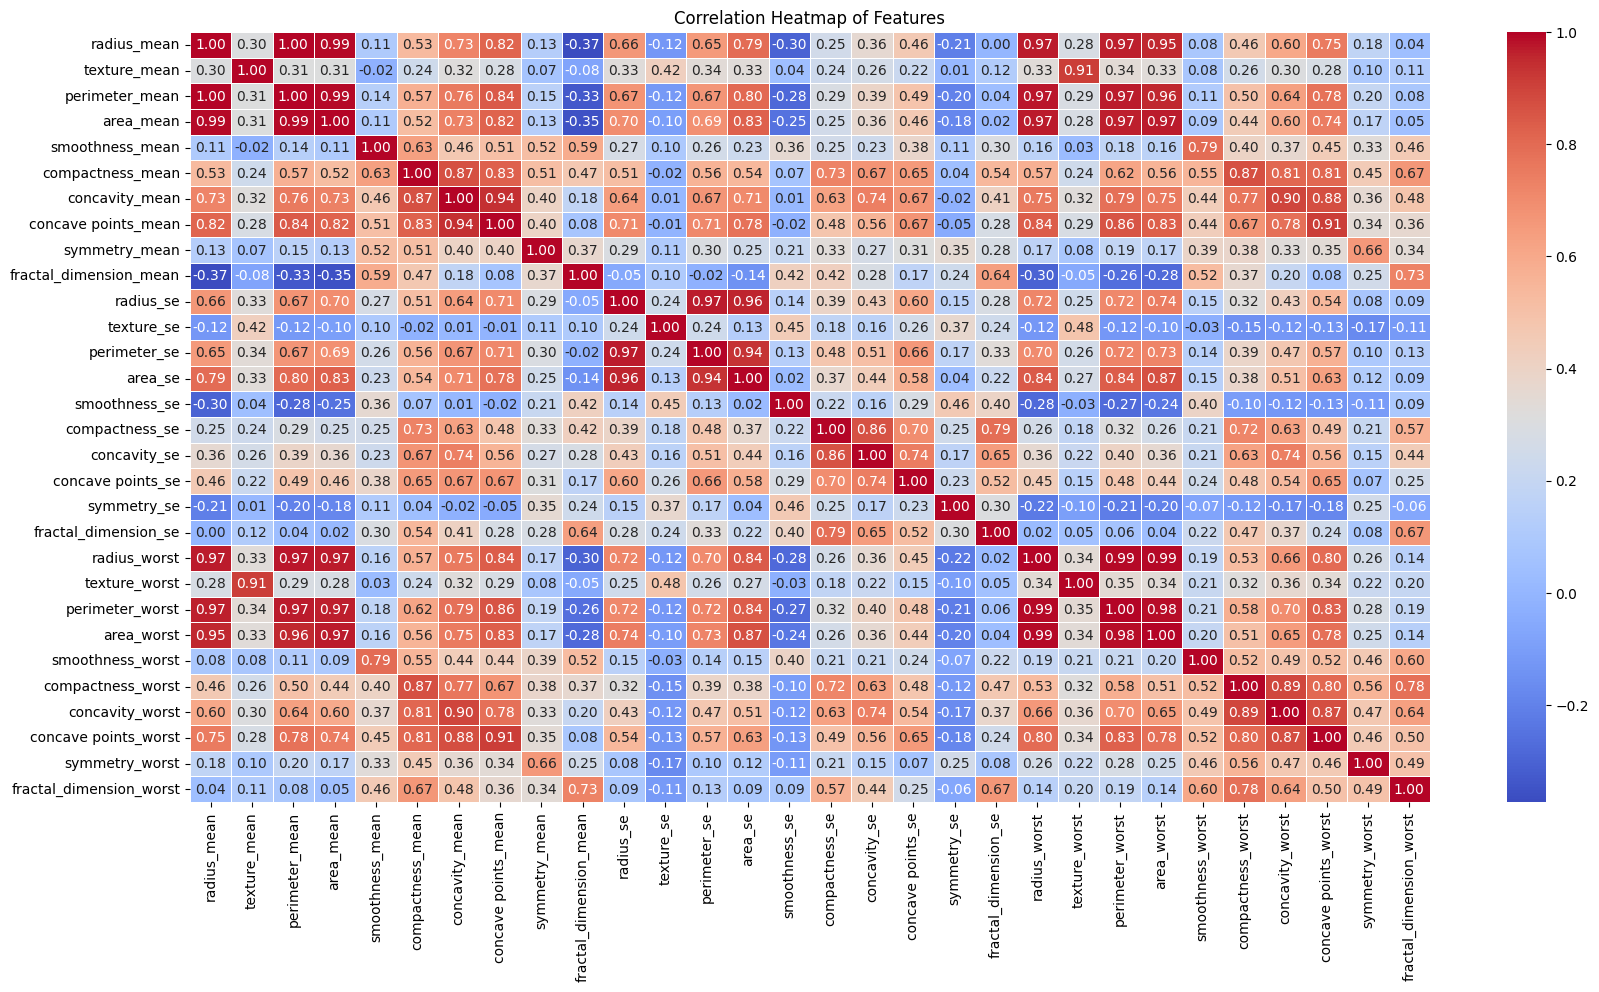

In [ ]:
# Exclude output column
feature_columns = BCD_cleaned.iloc[:, 1:]

# Calculate the correlation matrix
corr_matrix = feature_columns.corr()

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [ ]:
BCD = pd.DataFrame(BCD_cleaned)
print(BCD.shape)
BCD.head()

(495, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,0.643144,0.272574,0.615783,0.501591,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.606901,0.303571,0.539818,0.435214,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,0.601496,0.390260,0.595743,0.449417,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.556386,0.360075,0.508442,0.374508,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,0.629893,0.156578,0.630986,0.489290,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.519744,0.123934,0.506948,0.341575,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,0.258839,0.202570,0.267984,0.141506,0.12780,0.17000,0.1578,0.08089,0.2087,...,0.268232,0.312633,0.263908,0.136748,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,0.533343,0.347311,0.523875,0.380276,0.09463,0.10900,0.1127,0.07400,0.1794,...,0.531839,0.416844,0.511928,0.349194,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


## Splitting the Data

In [ ]:
X = BCD.drop(['diagnosis'] , axis = 1)
y = BCD['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

## Dictionaries for Comparison

In [ ]:
# Create a dictionary of accuracies for later comparison between models
accuracies = {}

# Create a dictionary of times for later comparison between models
times = {}

# Models

## KNN

In [ ]:
# Training the model 10 times; each with different k, ranging from 1 to 10
k_values = range(1, 11)
errors = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  knn_pred = knn.predict(X_test)
  error = 1 - accuracy_score(y_test, knn_pred)
  errors.append(error)

In [ ]:
pd.DataFrame({'Test values':y_test, 'Predict': knn_pred}).head()

,Test values,Predict
524,0,0
90,0,0
362,0,0
209,0,0
391,0,0


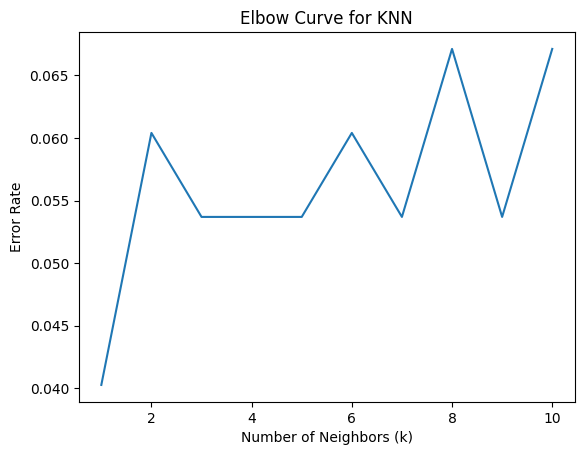

In [ ]:
# Plot the elbow curve
plt.plot(k_values, errors)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Curve for KNN')
plt.show()

In [ ]:
# The best k is 3, as it has the lowest error rate, which is relatively constant in comparison with other values of k
knn = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
knn.fit(X_train, y_train)
tt_knn = time.time() - start_time
times['knn'] = tt_knn
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
accuracies['knn'] = knn_acc
print("Accuracy:", knn_acc)

Accuracy: 0.9463087248322147


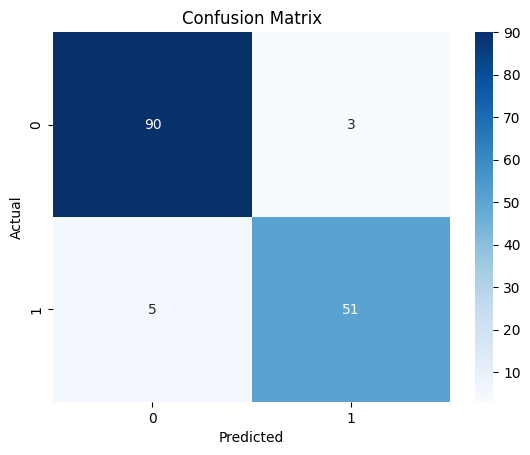

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, knn_pred)

# Create a confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels for axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## Naïve Bayes Classifier

In [ ]:
# This model has only one parameter which is 'var_smoothing', and its best value is the default: '1e-9'
nb = GaussianNB()
start_time = time.time()
nb.fit(X_train, y_train)
tt_nb = time.time() - start_time
times['nb'] = tt_nb

In [ ]:
nb_pred = nb.predict(X_test)

In [ ]:
pd.DataFrame({'Test values':y_test, 'Predict': nb_pred}).head()

,Test values,Predict
524,0,0
90,0,0
362,0,0
209,0,0
391,0,0


In [ ]:
nb_acc = accuracy_score(y_test, nb_pred)
accuracies['nb'] = nb_acc
print("Accuracy:", nb_acc)

Accuracy: 0.9463087248322147


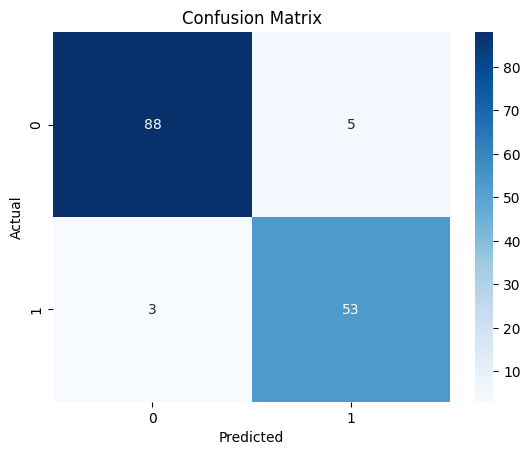

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, nb_pred)

# Create a confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels for axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## MLP Classifier

In [ ]:
# Training with default parameters: a 100-node hidden layer, relu activation, adam solver, and alpha=0.0001
mlp = MLPClassifier(random_state=42)
start_time = time.time()
mlp.fit(X_train, y_train)
tt_mlp_1 = time.time() - start_time
times['mlp_1'] = tt_mlp_1

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mlp_pred = mlp.predict(X_test)

In [ ]:
pd.DataFrame({'Test values':y_test, 'Predict': mlp_pred}).head()

,Test values,Predict
524,0,0
90,0,0
362,0,0
209,0,0
391,0,0


In [ ]:
mlp_acc = accuracy_score(y_test, mlp_pred)
accuracies['mlp_1'] = mlp_acc
print("Accuracy:", mlp_acc)

Accuracy: 0.9530201342281879


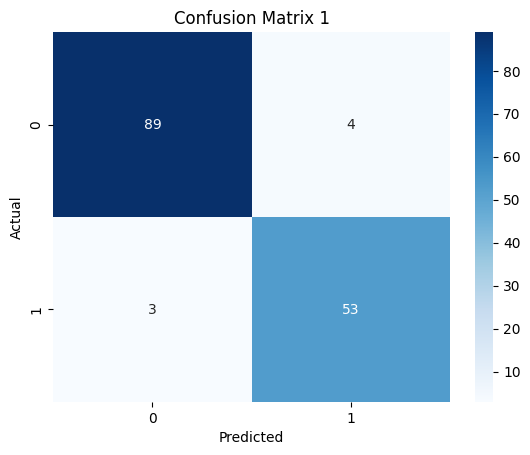

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, mlp_pred)

# Create a confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels for axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix 1')

# Show the plot
plt.show()

### Changing the Hyperparameters

In [ ]:
# Changing parameters: 3 hidden layers with 160, 80, and 40 nodes, logistic activation, and lbfgs solver
mlp_2 = MLPClassifier(hidden_layer_sizes=(160, 80, 40), activation='logistic', solver='lbfgs', random_state=42)
start_time = time.time()
mlp_2.fit(X_train, y_train)
tt_mlp_2 = time.time() - start_time
times['mlp_2'] = tt_mlp_2

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
mlp_pred_2 = mlp_2.predict(X_test)

In [ ]:
mlp_acc_2 = accuracy_score(y_test, mlp_pred_2)
accuracies['mlp_2'] = mlp_acc_2
print("Accuracy:", mlp_acc_2)

Accuracy: 0.9865771812080537


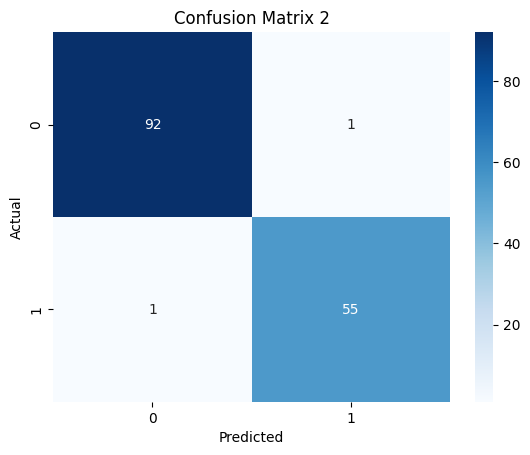

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, mlp_pred_2)

# Create a confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels for axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix 2')

# Show the plot
plt.show()

**The model with the 3 hidden layers is much better than that of the 1 hidden layer.**

## SVM classifier

In [ ]:
# Training with the default kernel 'rbf'
svm = SVC(random_state=42)
start_time = time.time()
svm.fit(X_train, y_train)
tt_svm_1 = time.time() - start_time
times['svm_1'] = tt_svm_1

In [ ]:
svm_pred = svm.predict(X_test)

In [ ]:
pd.DataFrame({'Test values':y_test, 'Predict': svm_pred}).head()

,Test values,Predict
524,0,0
90,0,0
362,0,0
209,0,0
391,0,0


In [ ]:
svm_acc = accuracy_score(y_test, svm_pred)
accuracies['svm_1'] = svm_acc
print("Accuracy:", svm_acc)

Accuracy: 0.959731543624161


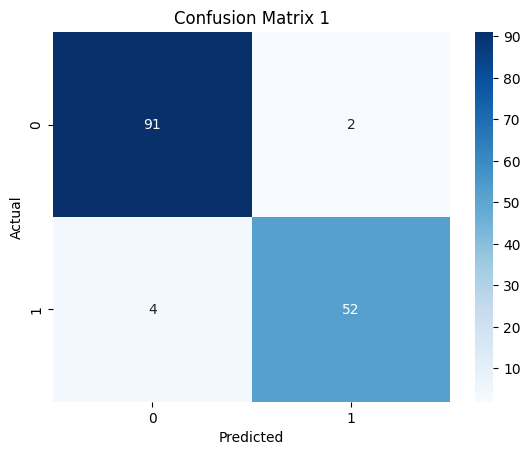

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, svm_pred)

# Create a confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels for axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix 1')

# Show the plot
plt.show()

### Changing the Hyperparameters

In [ ]:
# Training with a linear kernel
svm_2 = SVC(kernel='linear', random_state=42)
start_time = time.time()
svm_2.fit(X_train, y_train)
tt_svm_2 = time.time() - start_time
times['svm_2'] = tt_svm_2

In [ ]:
svm_pred_2 = svm_2.predict(X_test)

In [ ]:
svm_acc_2 = accuracy_score(y_test, svm_pred_2)
accuracies['svm_2'] = svm_acc_2
print("Accuracy:", svm_acc_2)

Accuracy: 0.9530201342281879


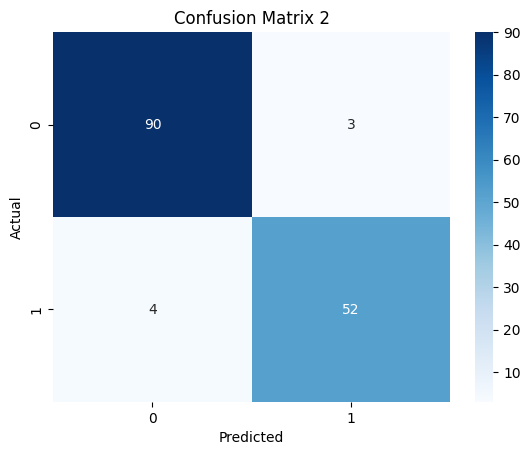

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, svm_pred_2)

# Create a confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels for axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix 2')

# Show the plot
plt.show()

**The 'rbf' kernel is slightly better than the 'linear' kernel.**

## Decision Tree

In [ ]:
# Training with a tree of max depth 3
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
start_time = time.time()
dt.fit(X_train, y_train)
tt_dt_1 = time.time() - start_time
times['dt_1'] = tt_dt_1

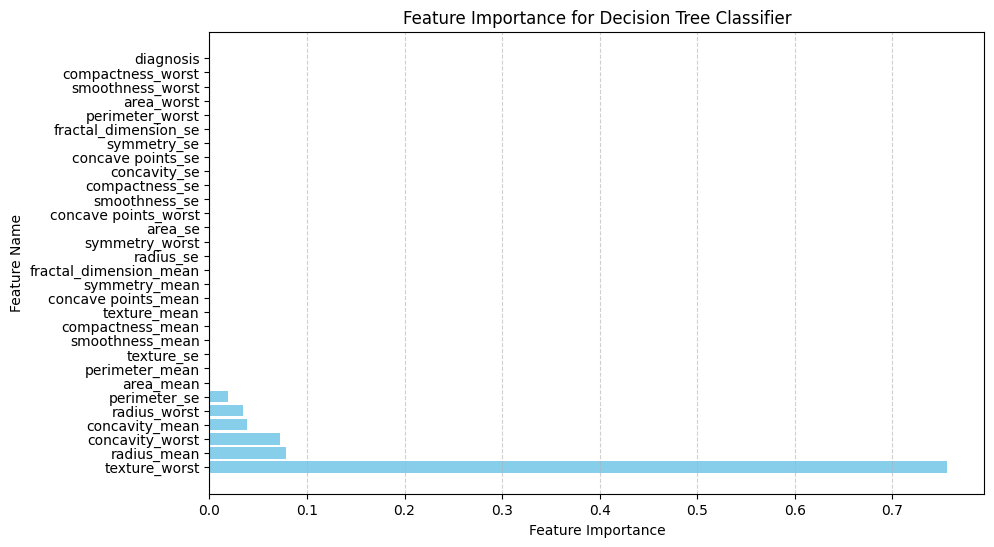

In [ ]:
# Get feature importances
feature_importances = dt.feature_importances_

# Get feature names
feature_names = feature_names = BCD.columns.tolist()

# Sort feature importances and feature names by importance (optional for better readability)
feature_importances_sorted = feature_importances.argsort()  # Sort indices by importance
feature_names_sorted = [feature_names[i] for i in feature_importances_sorted]  # Sort names by importance (if applicable)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.barh(feature_names_sorted, feature_importances[feature_importances_sorted], color='skyblue')  # Use sorted importance and names (if applicable)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Decision Tree Classifier')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature at the top
plt.show()

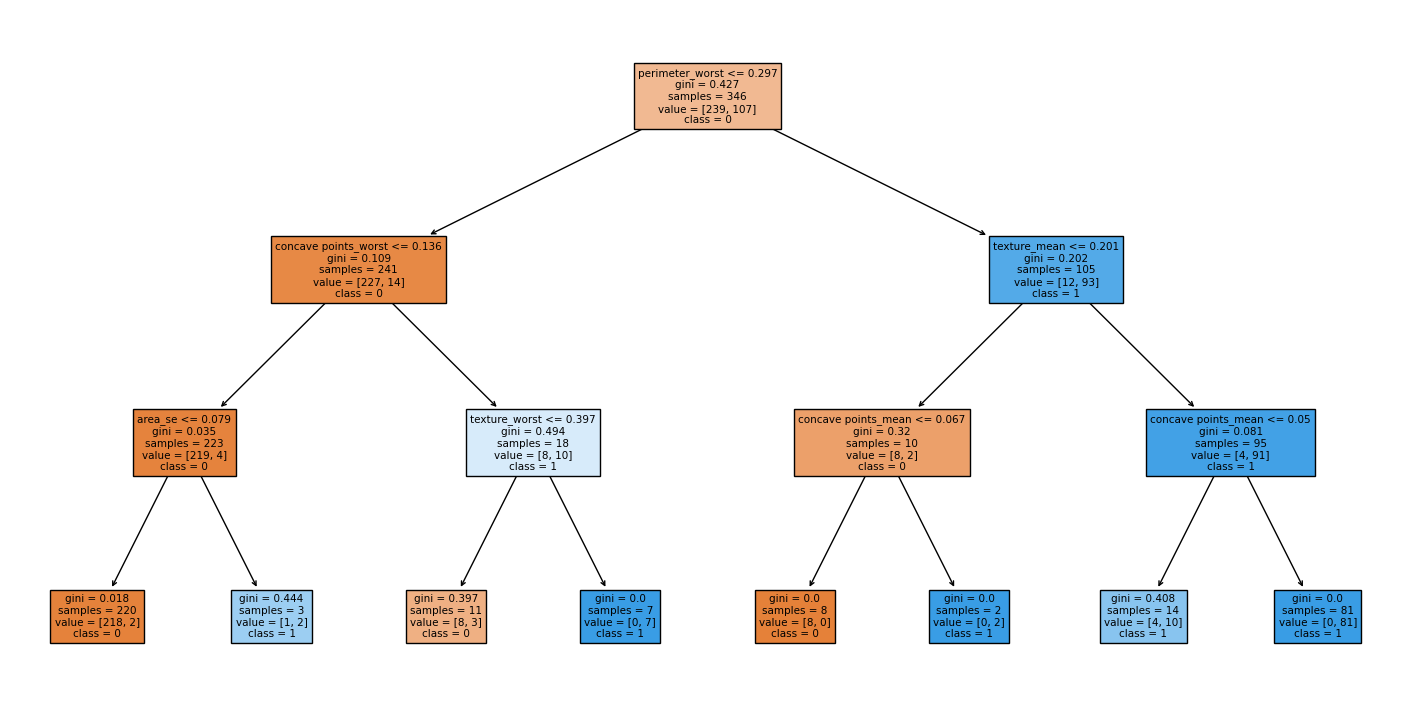

In [ ]:
# Convert feature names to strings
feature_names_str = [str(feature) for feature in X.columns]

# Convert class names to strings
class_names_str = [str(class_) for class_ in dt.classes_]

# Plot the decision tree with string names
plt.figure(figsize=(18, 9))
tree.plot_tree(dt, feature_names=feature_names_str, class_names=class_names_str, filled=True)
plt.show()

In [ ]:
dt_pred = dt.predict(X_test)

In [ ]:
pd.DataFrame({'Test values':y_test, 'Predict': dt_pred}).head()

,Test values,Predict
524,0,0
90,0,0
362,0,0
209,0,0
391,0,0


In [ ]:
dt_acc = accuracy_score(y_test, dt_pred)
accuracies['dt_1'] = dt_acc
print("Accuracy:", dt_acc)

Accuracy: 0.9395973154362416


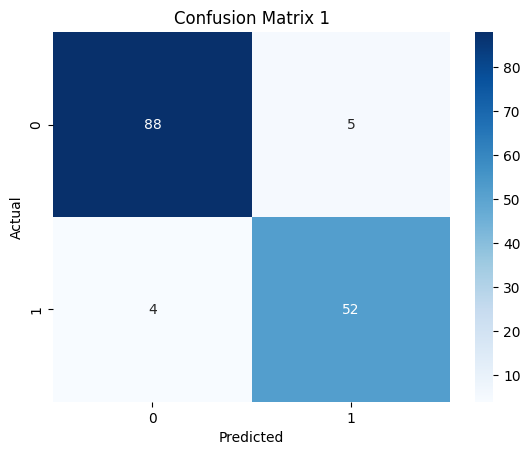

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, dt_pred)

# Create a confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels for axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix 1')

# Show the plot
plt.show()

### Changing the Hyperparameters

In [ ]:
# Allowing the tree to go deep as it needs
dt_2 = DecisionTreeClassifier(max_depth=10, min_samples_split=2, random_state=42)
start_time = time.time()
dt_2.fit(X_train, y_train)
tt_dt_2 = time.time() - start_time
times['dt_2'] = tt_dt_2

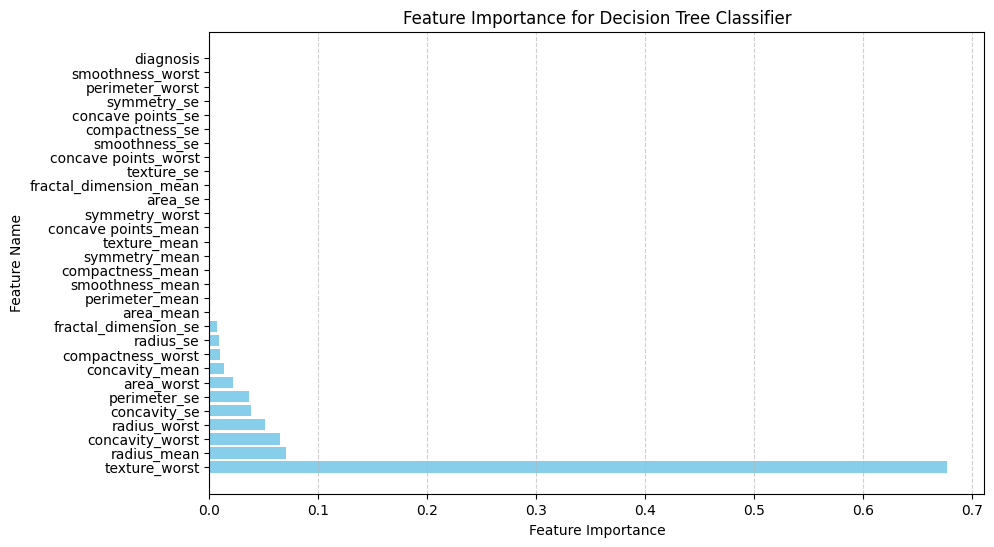

In [ ]:
# Get feature importances
feature_importances = dt_2.feature_importances_

# Get feature names
feature_names = feature_names = BCD.columns.tolist()

# Sort feature importances and feature names by importance (optional for better readability)
feature_importances_sorted = feature_importances.argsort()  # Sort indices by importance
feature_names_sorted = [feature_names[i] for i in feature_importances_sorted]  # Sort names by importance (if applicable)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.barh(feature_names_sorted, feature_importances[feature_importances_sorted], color='skyblue')  # Use sorted importance and names (if applicable)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Decision Tree Classifier')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature at the top
plt.show()

This model gave importance to 5 additional features than of the previous one.

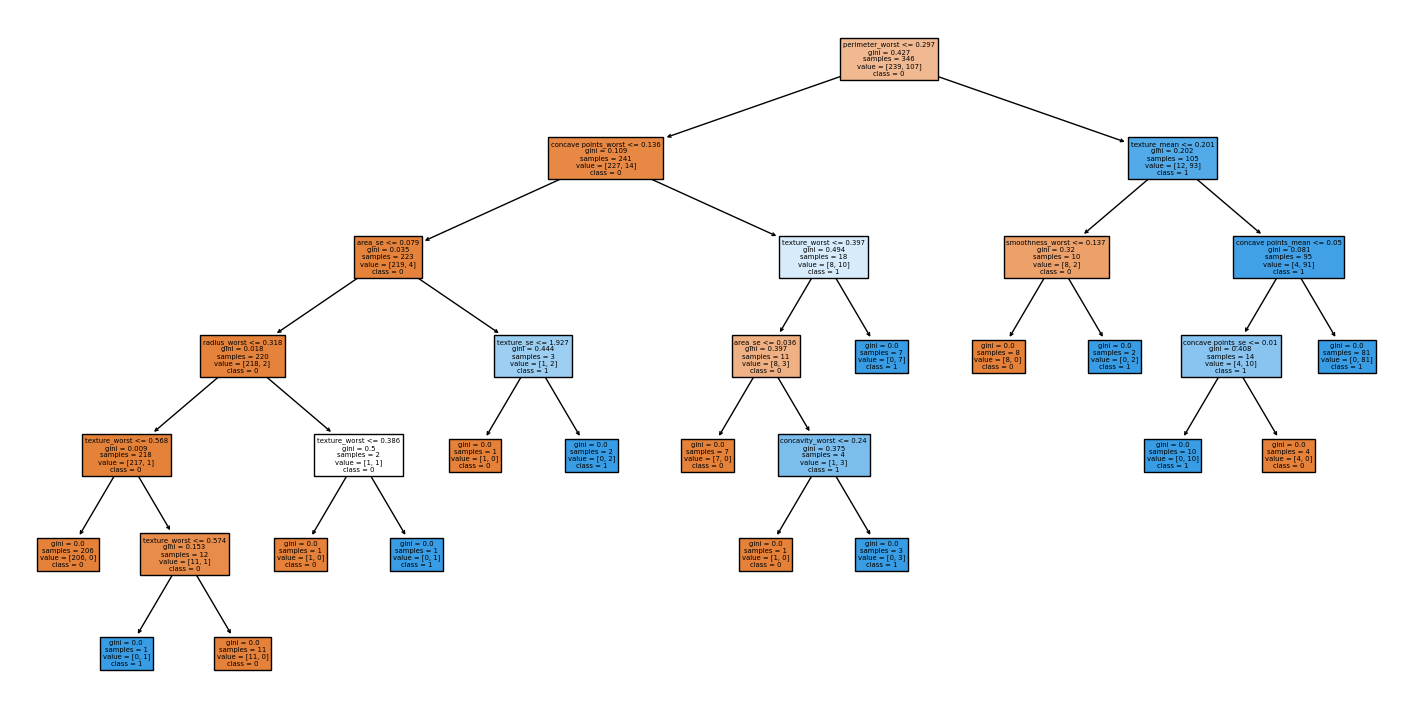

In [ ]:
# Convert feature names to strings
feature_names_str = [str(feature) for feature in X.columns]

# Convert class names to strings
class_names_str = [str(class_) for class_ in dt_2.classes_]

# Plot the decision tree with string names
plt.figure(figsize=(18, 9))
tree.plot_tree(dt_2, feature_names=feature_names_str, class_names=class_names_str, filled=True)
plt.show()

In [ ]:
dt_pred_2 = dt_2.predict(X_test)

In [ ]:
pd.DataFrame({'Test values':y_test, 'Predict': dt_pred_2}).head()

,Test values,Predict
524,0,0
90,0,0
362,0,0
209,0,0
391,0,0


In [ ]:
dt_acc_2 = accuracy_score(y_test, dt_pred_2)
accuracies['dt_2'] = dt_acc_2
print("Accuracy:", dt_acc_2)

Accuracy: 0.9261744966442953


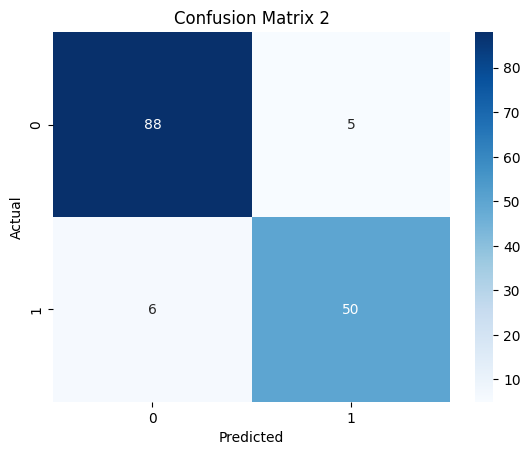

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, dt_pred_2)

# Create a confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels for axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix 2')

# Show the plot
plt.show()

**Simpler tree is better!**

# Comparison

## Training Time Comparison

In [ ]:
# Extract model names and times for plotting
models = list(times.keys())
times = list(times.values())

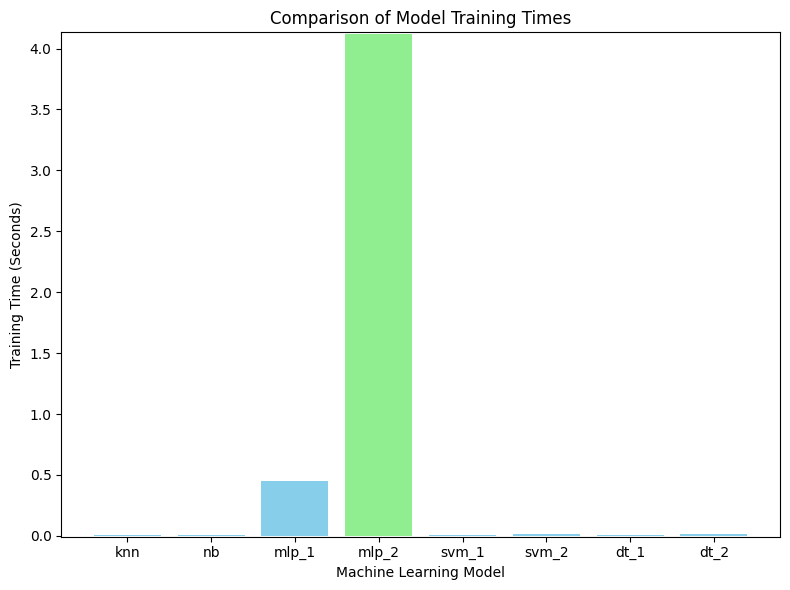

In [ ]:
# Get the minimum time
min_time = min(times)

# Get the maximum time
max_time = max(times)

# Define a color for the maximum time bar
max_time_color = 'lightgreen'

# Create a list to hold bar colors (default blue for all except max time)
bar_colors = ['skyblue'] * len(models)

# Find the index of the model with the maximum time
max_index = times.index(max_time)

# Set the color of the maximum time bar
bar_colors[max_index] = max_time_color

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.bar(models, times, color=bar_colors)
plt.xlabel('Machine Learning Model')
plt.ylabel('Training Time (Seconds)')
plt.title('Comparison of Model Training Times')
plt.ylim(min_time - 0.01, max_time + 0.01)  # Set y-axis limits with a buffer below the minimum

# Display the plot
plt.tight_layout()
plt.show()

## **The MLP classifier with 3 hidden layers had the maximum training time. The MLP classifier with 200 iterations follows it.**

## Accuracy Comparison

In [ ]:
# Extract model names and accuracies for plotting
models = list(accuracies.keys())
accuracies = list(accuracies.values())

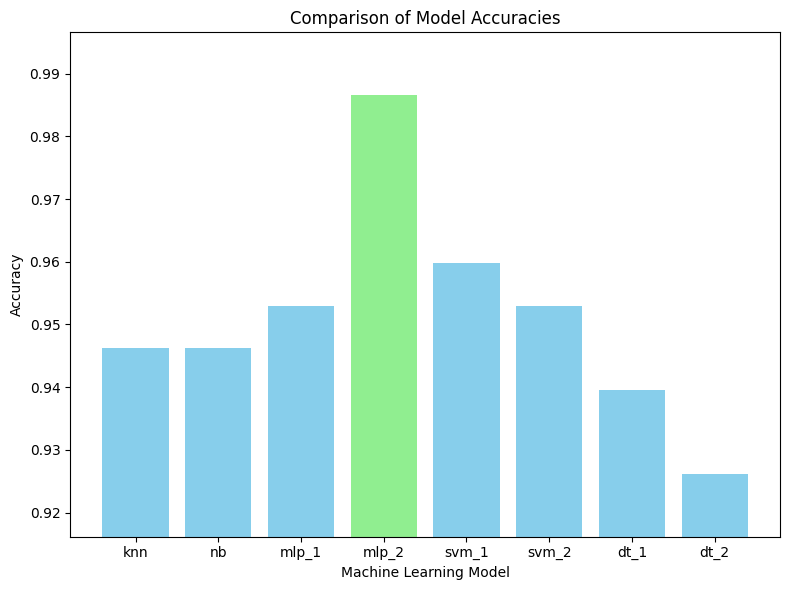

In [ ]:
# Get the minimum accuracy
min_accuracy = min(accuracies)

# Get the maximum accuracy
max_accuracy = max(accuracies)

# Define a color for the maximum accuracy bar
max_accuracy_color = 'lightgreen'

# Create a list to hold bar colors (default blue for all except max accuracy)
bar_colors = ['skyblue'] * len(models)

# Find the index of the model with the maximum accuracy
max_index = accuracies.index(max_accuracy)

# Set the color of the maximum accuracy bar
bar_colors[max_index] = max_accuracy_color

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.bar(models, accuracies, color=bar_colors)
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(min_accuracy - 0.01, max_accuracy + 0.01)  # Set y-axis limits with a buffer below the minimum

# Display the plot
plt.tight_layout()
plt.show()

## **The MLP classifier is the best here with accuracy of 98.65%**

## **Seeking high accuracy needs more training time. Compromising is the key!**